Final Project

In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
#import folium
#import plotly.express as px

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split       


#import seaborn as sns

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


In [2]:
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

In [3]:

import keras
from tensorflow.keras import Sequential
#from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow
print(keras.__version__)

2.4.3


In [6]:
csv_filename = 'TTS_data .csv'

dataf = pd.read_csv(csv_filename)

/tmp/ipykernel_349/2585671091.py:3: DtypeWarning: Columns (2,3,13,28,29,30,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataf = pd.read_csv(csv_filename)


In [8]:
dataf

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inv_model1_clean,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty
0,0,Arizona Public Service,-1,3,24-Jan-00,12.025,-1.00,-1.0,RES,0,...,IQ7-60-2-US [240V],-1.0,-1,1,0,0,0.240,0,-1.0,-1.0
1,1,Arizona Public Service,-1,5,6-Mar-00,8.640,-1.00,-1.0,RES,0,...,SE7600H-US [240V],-1.0,-1,0,0,1,7.616,1,-1.0,-1.0
2,2,Arizona Public Service,-1,8,7-May-02,2.400,-1.00,-1.0,RES,0,...,Power Station PS247-15-180 [120V],-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0
3,3,Arizona Public Service,-1,10,17-Dec-02,2.160,-1.00,-1.0,RES,0,...,Power Station PS247-15-180 [120V],-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0
4,4,Arizona Public Service,-1,11,19-Dec-02,2.520,-1.00,-1.0,RES,0,...,Power Station PS247-15-180 [120V],-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617575,617575,Wisconsin Focus on Energy,-1,1147065,15-Dec-20,16.060,38320.00,2507.5,COM,0,...,-1,-1.0,-1,-1,-1,-1,-1.000,-1,-1.0,-1.0
617576,617576,Wisconsin Focus on Energy,-1,1147212,16-Dec-20,10.370,43039.36,500.0,RES,0,...,-1,-1.0,-1,-1,-1,-1,-1.000,-1,-1.0,-1.0
617577,617577,Wisconsin Focus on Energy,-1,1142267,16-Dec-20,13.860,52360.00,1000.0,RES,1,...,-1,-1.0,-1,-1,-1,-1,-1.000,-1,-1.0,-1.0
617578,617578,Wisconsin Focus on Energy,-1,1143039,17-Dec-20,6.820,25583.00,500.0,RES,0,...,-1,-1.0,-1,-1,-1,-1,-1.000,-1,-1.0,-1.0


## Introductory Plots

<AxesSubplot:xlabel='mod_nameplate_capacity1', ylabel='mod_efficiency1'>

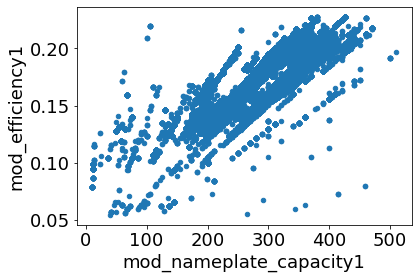

In [5]:
X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
dataf.plot.scatter('mod_nameplate_capacity1','mod_efficiency1')

<AxesSubplot:xlabel='mod_nameplate_capacity1', ylabel='inv_outputcapacity1'>

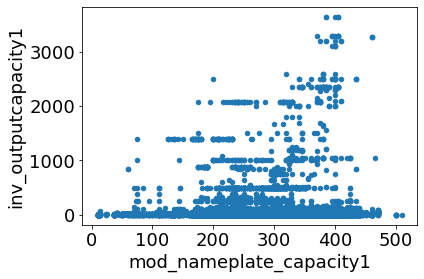

In [15]:
dataf.plot.scatter( 'mod_nameplate_capacity1', 'inv_outputcapacity1')

<AxesSubplot:xlabel='inv_battery_hybrid1', ylabel='mod_efficiency1'>

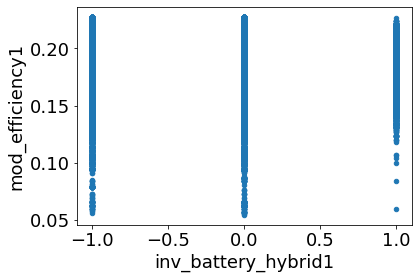

In [16]:
dataf.plot.scatter( 'inv_battery_hybrid1', 'mod_efficiency1')

<AxesSubplot:xlabel='systemSizeInDCSTC_KW_', ylabel='mod_efficiency1'>

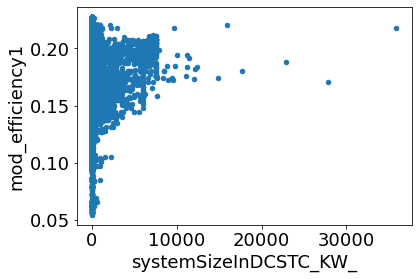

In [20]:
dataf.plot.scatter( 'systemSizeInDCSTC_KW_', 'mod_efficiency1')

<AxesSubplot:xlabel='moduleQty_1', ylabel='mod_efficiency1'>

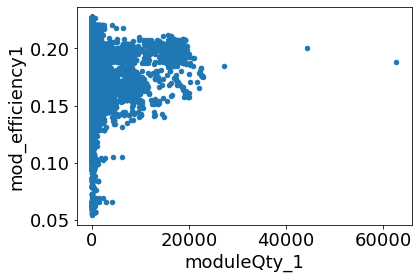

In [19]:

dataf.plot.scatter( 'moduleQty_1', 'mod_efficiency1')

<AxesSubplot:xlabel='inv_outputcapacity1', ylabel='mod_efficiency1'>

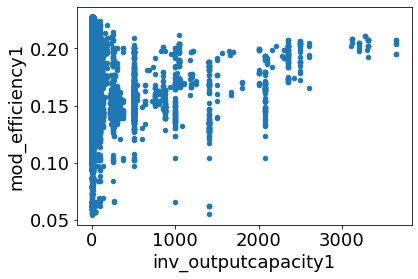

In [17]:
dataf.plot.scatter( 'inv_outputcapacity1', 'mod_efficiency1')

## Linear Regression Model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98, shuffle=True)

In [9]:
print(X[:10000])

[[325.]
 [320.]
 [130.]
 ...
 [255.]
 [235.]
 [235.]]


In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)

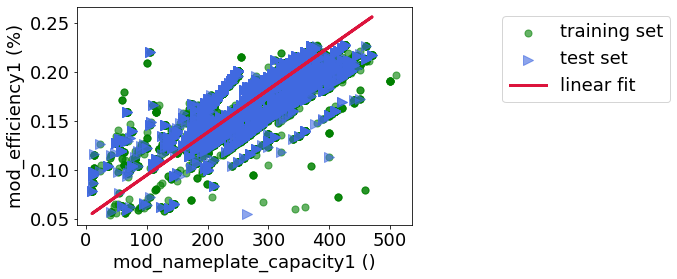

In [11]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('mod_nameplate_capacity1 ()')
plt.ylabel('mod_efficiency1 (%)')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

In [12]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, Y_calc_test))
# Print the coefficient of determination - 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, Y_calc_test))

Mean squared error: 0.00
Coefficient of determination: 0.78


In [48]:
# dataf.drop(dataf[dataf['inv_model1_clean'] == -1].index, inplace = True)

dataf['inv_model1_clean']

2                         IQ7-60-2-US [240V]
4                          SE7600H-US [240V]
7          Power Station PS247-15-180 [120V]
9          Power Station PS247-15-180 [120V]
10         Power Station PS247-15-180 [120V]
                         ...                
999996           SPR-X21-350-BLK-E-AC [240V]
999997           SPR-X21-350-BLK-E-AC [240V]
999998           SPR-X21-350-BLK-E-AC [240V]
999999                     SE7600H-US [240V]
1000000                                  NaN
Name: inv_model1_clean, Length: 591067, dtype: object

In [65]:
bat = dataf['inv_battery_hybrid1'].values.reshape(-1, 1)


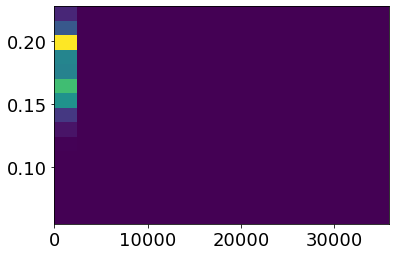

In [37]:
# plot:
fig, ax = plt.subplots()

ax.hist2d(dataf['systemSizeInDCSTC_KW_'],dataf['mod_efficiency1'], bins = 15)

#ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

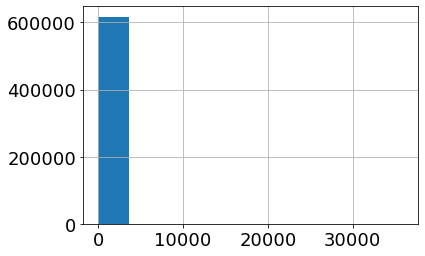

In [26]:
dataf['systemSizeInDCSTC_KW_'].hist()
plt.show()

In [18]:
# Declare regressor object & train it for nameplate capacitance and efficiency
dftree =  sklearn.tree.DecisionTreeRegressor().fit(X_train, y_train)
# Predict on .... set values

#reg = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = dftree.predict(X_test)
# Compute the r2 score and MSE
r2 = r2_score(y_test, y_pred)

#return r2, MSE, y_predict, X_train, X_test, y_train, y_test
print('r2 value:', r2)
# Evaluate MSE error
MSE = mean_squared_error(y_test, y_pred)
print('MSE Value : ', MSE)

r2 value: 0.8424765510626034
MSE Value :  7.565296827896611e-05


## Neural Network

In [42]:
X = dataf[['mod_nameplate_capacity1']].values
Y = dataf[['mod_efficiency1']].values

In [43]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=98)

In [49]:
# Create the scaler from the training data only
X_train_scaler = StandardScaler().fit(X_train_pn)

# Apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [50]:
def simple_network():
    model = Sequential()
    model.add(Dense(7, activation = 'relu', kernel_initializer = 'normal'))
    model.add(Dense(1, kernel_initializer= 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [51]:
# Create an instance of your simple_network() function
my_model = simple_network()
my_model.fit(X_train, y_train)
# Print it's summary()
my_model.summary()

2022-03-07 21:59:16.242398: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-07 21:59:16.243082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 21:59:16.244936: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-07 21:59:16.345530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-07 21:59:16.346173: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1796565000 Hz


15440/15440 [==============================] - 53s 3ms/step - loss: 7.7428e-04
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 14        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [54]:
np.random.seed(98)
estimator = KerasRegressor(build_fn=simple_network,
                          epochs = 30, batch_size= 1000, verbose =0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs =30,
                       batch_size=1000, verbose =1)


Epoch 1/30
332/332 [==============================] - 3s 8ms/step - loss: 0.0137 - val_loss: 1.2534e-04
Epoch 2/30
332/332 [==============================] - 3s 8ms/step - loss: 1.1314e-04 - val_loss: 9.5073e-05
Epoch 3/30
332/332 [==============================] - 2s 6ms/step - loss: 9.1033e-05 - val_loss: 8.9058e-05
Epoch 4/30
332/332 [==============================] - 2s 5ms/step - loss: 8.8074e-05 - val_loss: 8.8534e-05
Epoch 5/30
332/332 [==============================] - 2s 5ms/step - loss: 8.7563e-05 - val_loss: 8.8476e-05
Epoch 6/30
332/332 [==============================] - 2s 6ms/step - loss: 8.7404e-05 - val_loss: 8.8099e-05
Epoch 7/30
332/332 [==============================] - 4s 11ms/step - loss: 8.6748e-05 - val_loss: 8.7963e-05
Epoch 8/30
332/332 [==============================] - 5s 16ms/step - loss: 8.7272e-05 - val_loss: 8.7799e-05
Epoch 9/30
332/332 [==============================] - 2s 7ms/step - loss: 8.6767e-05 - val_loss: 8.6991e-05
Epoch 10/30
332/332 [=========

In [55]:
print(history.history.keys())
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

dict_keys(['loss', 'val_loss'])
final MSE for train is 0.00 and for validation is 0.00


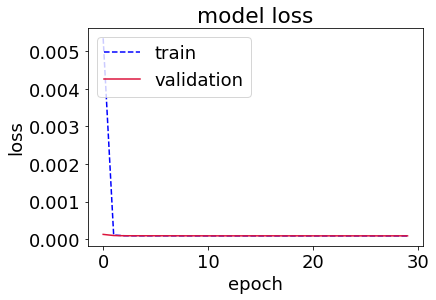

In [56]:
# Plot of model loss
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
# Test set error
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

3860/3860 [==============================] - 11s 3ms/step - loss: 0.6498
test set mse is 0.65


## Comparison of Efficiency based on Latitude and Longitude

In [35]:
Xl = dataf['latitude'].values.reshape(-1, 1)
Xl = np.delete(Xl,[' '])
yl = dataf['mod_efficiency1'].values
dataf.plot.scatter('mod_efficiency1', 'latitude')

IndexError: arrays used as indices must be of integer (or boolean) type

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=98, shuffle=True)

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('mod_nameplate_capacity1 ()')
plt.ylabel('mod_efficiency1 (%)')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='mod_efficiency1'>

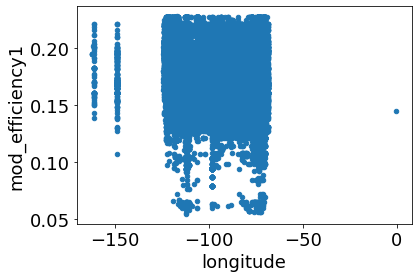

In [15]:
X = dataf['longitude'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
dataf.plot.scatter('longitude','mod_efficiency1')